In [ ]:
!pip install transformers datasets

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import pipeline

In [ ]:
pipe = pipeline("question-answering", model="distilbert/distilbert-base-uncased-distilled-squad")

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
context = "My name is Bala, am a software engineer and I am working in the IT industry"
question = "Who is Bala?"

pipe(context = context, question=question)

{'score': 0.35348618030548096,
 'start': 0,
 'end': 30,
 'answer': 'My name is Bala, am a software'}

Context: "Albert Einstein was born in Germany in 1879. He developed the theory of relativity."
Question: "Where was Einstein born?"
BERT's Scoring Process:
Step 1: Start Position Scores

python
# Scores for each token as potential answer start
token_start_scores = {
    "Albert": 0.02,
    "Einstein": 0.05,
    "was": 0.01,
    "born": 0.03,
    "in": 0.12,
    "Germany": 0.74,    # High score - likely start
    "in": 0.02,
    "1879": 0.01
}
Step 2: End Position Scores

python
# Scores for each token as potential answer end
token_end_scores = {
    "Albert": 0.01,
    "Einstein": 0.02,
    "was": 0.01,
    "born": 0.02,
    "in": 0.03,
    "Germany": 0.89,    # High score - likely end
    "in": 0.01,
    "1879": 0.01
}
Step 3: Final Answer Score

python
# Combined score for span "Germany"
answer_span_score = start_score * end_score
                  = 0.74 * 0.89
                  = 0.66

# Answer: "Germany" with 66% confidence

In [ ]:
context[36:51]

'the IT industry'

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-distilled-squad")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

In [ ]:
print(tokenizer)

DistilBertTokenizer(name_or_path='distilbert-base-uncased-distilled-squad', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


In [ ]:
tokenizer.vocab_size

30522

In [ ]:
question = "Where is the Eiffel Tower?"
answer = "The Eiffel Tower is located in Paris, France"

inputs = tokenizer(question, answer, return_tensors="pt", truncation=True, padding="max_length")

In [ ]:
inputs

{'input_ids': tensor([[  101,  2073,  2003,  1996,  1041, 13355,  2884,  3578,  1029,   102,
          1996,  1041, 13355,  2884,  3578,  2003,  2284,  1999,  3000,  1010,
          2605,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [ ]:
tokenizer.decode(inputs["input_ids"][0])

'[CLS] where is the eiffel tower? [SEP] the eiffel tower is located in paris, france [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA

In [ ]:
len(inputs["input_ids"][0])

512

In [ ]:
inputs["attention_mask"][0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
model = DistilBertForQuestionAnswering.from_pretrained("distilbert-base-uncased-distilled-squad")

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

In [ ]:
model

DistilBertForQuestionAnswering(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
     

In [ ]:
output = model(**inputs)

In [ ]:
output.start_logits

tensor([[-5.1846, -4.6086, -7.0662, -6.7674, -6.5456, -7.9527, -8.3348, -7.5995,
         -7.8775, -5.2951,  2.6311,  0.9812, -4.2267, -4.6518, -2.3515,  0.3982,
          3.2570,  4.4995,  8.5456, -1.9503,  2.3682, -5.2948, -8.7368, -8.8051,
         -8.9329, -8.9411, -9.0265, -9.1145, -9.1554, -9.1564, -9.1444, -9.1378,
         -9.1993, -9.2465, -9.1897, -9.1482, -9.0885, -9.1363, -9.1554, -9.1460,
         -9.1390, -9.1362, -9.1014, -9.0810, -8.9868, -8.8835, -8.8770, -8.9127,
         -8.9895, -9.0093, -8.9187, -8.9795, -9.0379, -9.0774, -9.1600, -9.1214,
         -9.1384, -9.2226, -9.2286, -9.2634, -9.2927, -9.2872, -9.3088, -9.2728,
         -9.1297, -9.0592, -9.0591, -9.1848, -9.2349, -9.1849, -9.1296, -9.0641,
         -8.9853, -8.9799, -8.8797, -8.8766, -8.9842, -8.9775, -9.0183, -8.9990,
         -8.9878, -9.0870, -9.1681, -9.1881, -9.2124, -9.1922, -9.2067, -9.2613,
         -9.2516, -9.2470, -9.2500, -9.2406, -9.1981, -9.0365, -8.9451, -9.1023,
         -9.1844, -9.2131, -

In [ ]:
import torch
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)

print(start_index, end_index)

tensor(18) tensor(20)


In [ ]:
import tensorflow as tf

start_index = tf.argmax(output.start_logits.detach().numpy(), axis=-1)
end_index = tf.argmax(output.end_logits.detach().numpy(), axis=-1)

print(start_index, end_index)

tf.Tensor([18], shape=(1,), dtype=int64) tf.Tensor([20], shape=(1,), dtype=int64)


In [ ]:
predicted_answer = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][start_index:end_index+1])
print(predicted_answer)

['paris', ',', 'france']


In [ ]:
answer = inputs["input_ids"][0][start_index:end_index+1]
answer = tokenizer.decode(answer)

print(answer)

paris, france


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


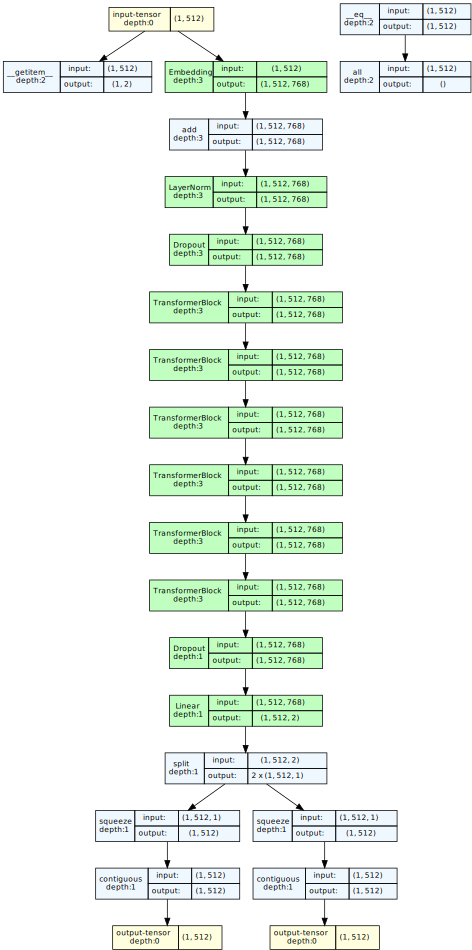

In [ ]:
!pip install torchview
from torchview import draw_graph

# Assuming 'model' is your PyTorch model and 'inputs' are sample inputs
model_graph = draw_graph(model, input_data=inputs["input_ids"])
model_graph.visual_graph

In [ ]:
def my_function(param1, param2, param3):
    print(f"Got: {param1}, {param2}, {param3}")

my_dict = {"param1": "A", "param2": "B", "param3": "C"}

# Using 'my_dict' (WRONG):
# my_function(my_dict)  # ERROR! Function expects 3 args, got 1 dict  ** wrong

# Using '**my_dict' (CORRECT):
my_function(**my_dict)  # SUCCESS! Unpacks to: param1="A", param2="B", param3="C"

Got: A, B, C
